# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Solved by: Riddhi Tokdar

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data
bike=pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check the shape of data
bike.shape

(730, 16)

In [5]:
#check for null values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

As shown above there is no null value in the dataset

# Data Modeling

The instant column is simply an indexing column. So we are going to drop the same

In [6]:
#drop instant column
bike.drop(columns='instant',inplace=True)
#check df after dropping
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
#change dtype of dteday to datetime
bike['dteday']=pd.to_datetime(bike['dteday'],format='%d-%m-%Y')


In [8]:
#check unique  in dteday
print(bike['dteday'].dt.year.unique())
print(bike['dteday'].dt.month.unique())

[2018 2019]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


From the data dictionary, it can be observed that the data for year is already given in 'yr' column with 0:2018 and 1:2019
The month is given in mnth column. The date of the month is not much relevant as details of holidays, weekend/weekday, the day of that dates are alreadty given in other columns. So, we can safely drop this column as we would not be losing any information by droping this column

In [9]:
#drop dteday column
bike.drop(columns='dteday',inplace=True)
#check df after dropping
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


The columns casual and registered contains the count of bike booked by different categories of customers. As our objective is to find the total count of bikes and not by specific category, we will drop these two columns.

In [10]:
#drop dteday column
bike.drop(columns=['casual','registered'],inplace=True)

In [11]:
#map season to categorical variable
season_codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike['season'] = bike['season'].map(season_codes)

In [12]:
#check data
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#map months to categorical variable
month_codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike['mnth'] = bike['mnth'].map(month_codes)

In [14]:
#check data
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#check distict weekdays:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

for weekday 0 and 6 if holiday is 0, working day is also zero. We can infer that 0 and 6 refers to weekends, with 0=Sunday and 6=Saturday. 

In [16]:
#map days to categorical variable
day_codes={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}
bike['weekday'] = bike['weekday'].map(day_codes)

In [17]:
#check data
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
#map weather to categorical variable
weather_codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike['weathersit'] = bike['weathersit'].map(weather_codes)

In [19]:
#check data
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualisation 

season,yr,mnth,holiday,weekday,workingday,weathersit are all categorical variables

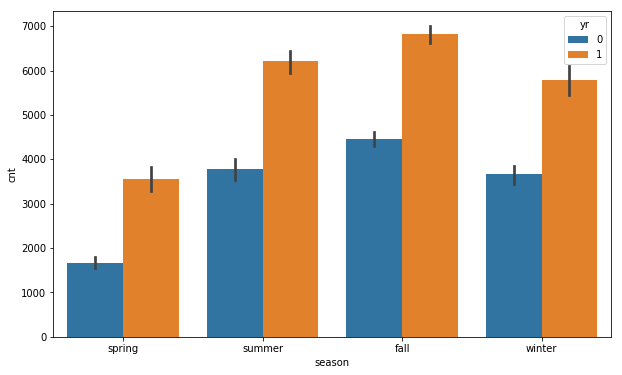

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='season',y='cnt',hue='yr',data=bike)
plt.show()

In both 2018 and 2019, the count increase from spring to summer and fall and then decreases in winter

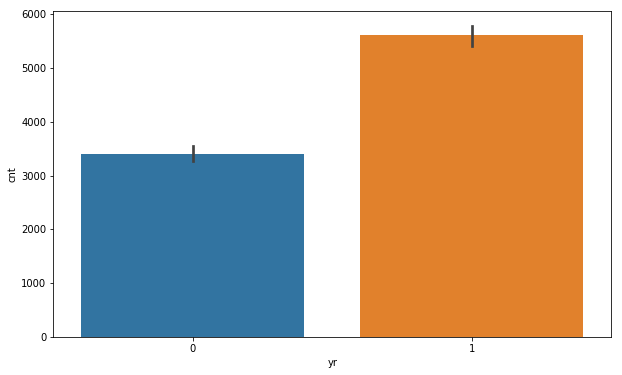

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x='yr',y='cnt',data=bike)
plt.show()

Count in 2019 was higher than 2018

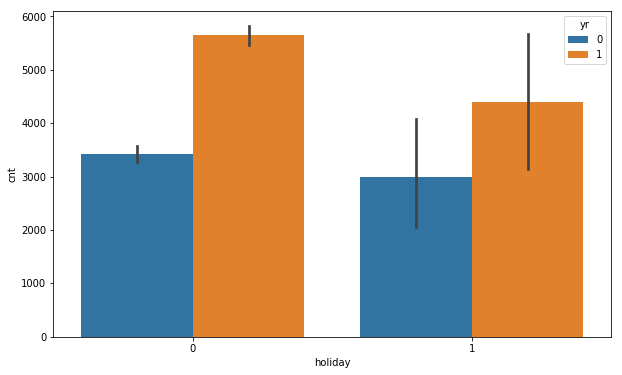

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='holiday',y='cnt',hue='yr',data=bike)
plt.show()

Count on Holiday was higher than non-holidays in both year

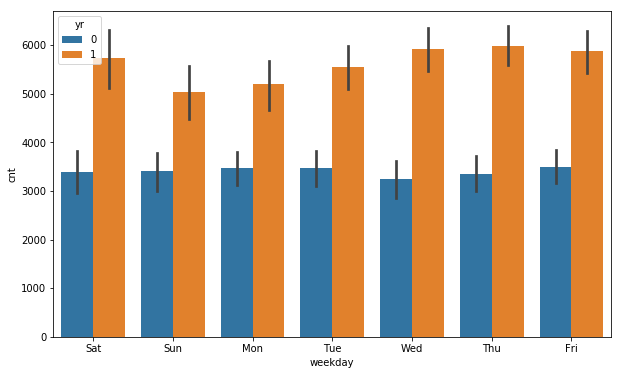

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x='weekday',y='cnt',hue='yr',data=bike)
plt.show()

Count in weekdays are mostly similar with slight increase on weekends

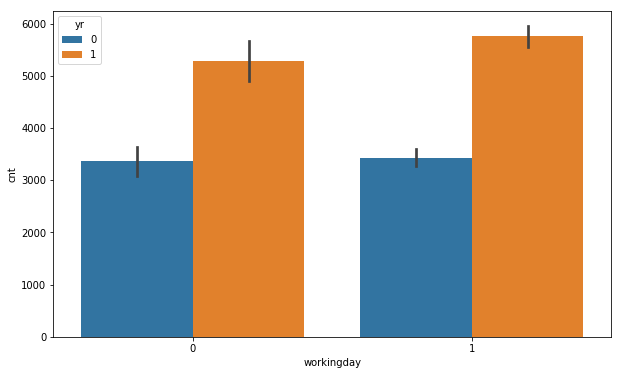

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x='workingday',y='cnt',hue='yr',data=bike)
plt.show()

There is slight increase in count on working days

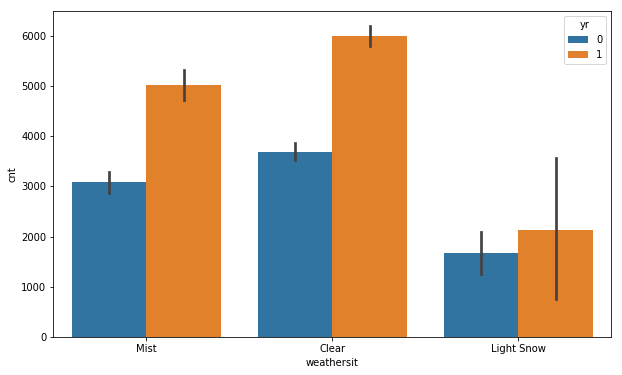

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='weathersit',y='cnt',hue='yr',data=bike)
plt.show()

There is higher count during clear weather, follow by Mist weather,

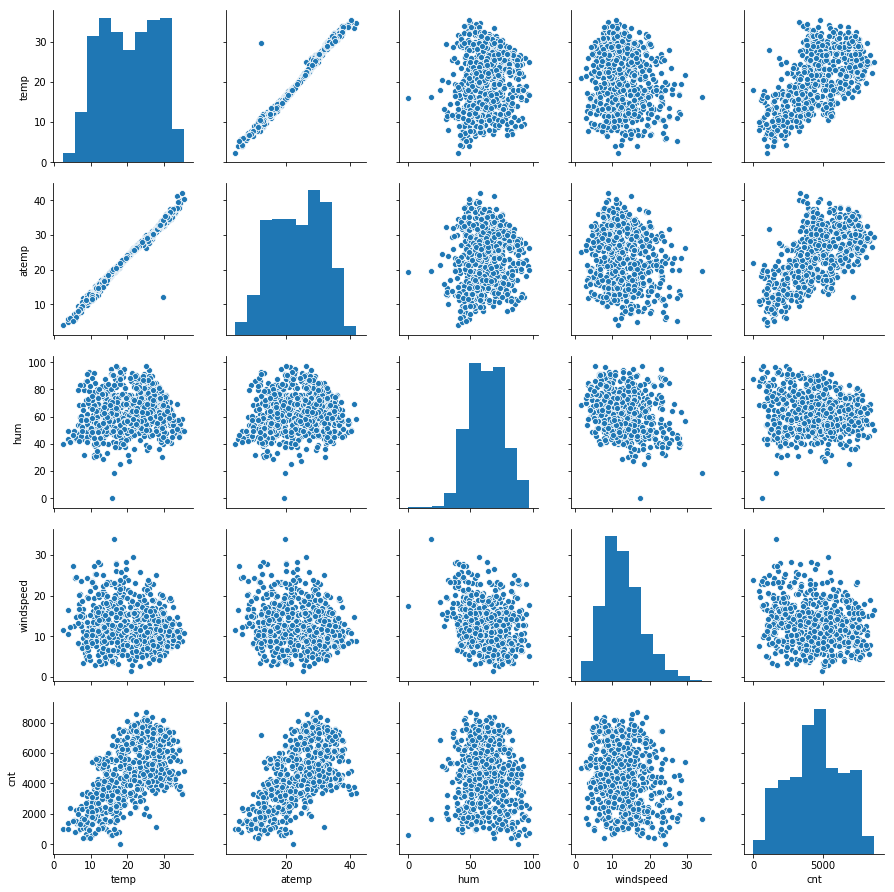

In [26]:
#visualising numeric variables
num_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']
sns.pairplot(bike[num_vars])

In [27]:
numerical_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']

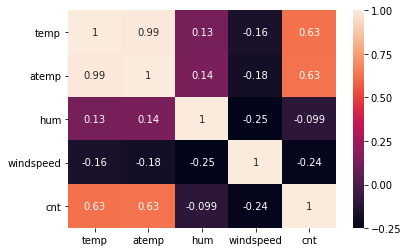

In [28]:
sns.heatmap(bike[numerical_vars].corr(),annot=True)

In [29]:
#temp and atemp are highly correlated. So,we can drop one

bike.drop('atemp',axis=1,inplace=True)

In [30]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


# Dummy Variable

In [31]:
#unclear whether using sklearn label assigns priorities or not

#creating dummy variables

dummy_var_cols = ['mnth', 'season', 'weekday', 'weathersit']
status=pd.get_dummies(bike[dummy_var_cols],drop_first=True)
status.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
#concatenate the dummy df with original df
bike=pd.concat([bike,status],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [33]:
#drop the columns for which dummy variables are created
bike.drop(columns=dummy_var_cols,inplace=True)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
bike.shape

(730, 29)

## Splitting the Data into Training and Testing Sets

In [36]:
#import necessary library
from sklearn.model_selection import train_test_split

#split in train test

bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 200)

In [37]:
num_vars=['temp','hum', 'windspeed','cnt']

### Rescaling the Features using MinMax Scaling

In [38]:
#import libarary
from sklearn.preprocessing import MinMaxScaler
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

#1.create an object
scaler=MinMaxScaler()

#2.fit on data and transform to rescale the data
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])


In [39]:
#check recscaled data
bike_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
728,1,0,0,0.252441,0.498067,0.676936,0.164795,0,1,0,...,0,0,0,0,1,0,0,0,0,0
56,0,0,0,0.286664,0.554315,0.338464,0.185682,0,0,1,...,0,0,0,1,0,0,0,0,0,0
13,0,0,1,0.130569,0.554222,0.214724,0.119522,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,0,0,0,0.503767,0.785315,0.173093,0.352529,0,0,0,...,1,0,0,0,1,0,0,0,0,1
252,0,0,0,0.771134,0.776728,0.270509,0.593263,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [40]:
y_train = bike_train.pop('cnt')
X_train = bike_train

# Building  model

#### RFE
Recursive feature elimination

In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE, choosing 15 of 30 columns
rfe = rfe.fit(X_train, y_train)

In [43]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
1,holiday,True,1
2,workingday,True,1
3,temp,True,1
4,hum,True,1
5,windspeed,True,1
22,weekday_Sun,True,1
7,mnth_Dec,True,1
21,weekday_Sat,True,1
19,season_winter,True,1


In [44]:
#columns selected through rfe
col= X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'mnth_Dec',
       'mnth_Nov', 'mnth_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weekday_Sat', 'weekday_Sun', 'weathersit_Light Snow'],
      dtype='object')

In [45]:
#columns not selected through rfe
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [46]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

##### Model 1:

In [47]:
#importing stats model library
import statsmodels.api as sm 
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)

In [48]:
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [49]:
# summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          4.85e-192
Time:                        20:56:56   Log-Likelihood:                 498.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     495   BIC:                            -903.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [50]:
#checking VIF
#importing library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#create a data frame containing names of all columns and their VIF
vif = pd.DataFrame()
X = X_train_rfe 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,55.41
12,weekday_Sat,12.18
13,weekday_Sun,11.48
9,season_spring,5.11
3,temp,3.65
1,holiday,3.63
11,season_winter,3.44
10,season_summer,2.32
7,mnth_Nov,1.75
6,mnth_Dec,1.36


Drop the column with High P value

In [52]:
#drop column with high p value
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

In [53]:
X_train_rfe.head()

,yr,workingday,temp,hum,windspeed,mnth_Dec,mnth_Nov,mnth_Sep,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,weathersit_Light Snow
728,1,0,0.252441,0.498067,0.676936,1,0,0,1,0,0,0,1,0
56,0,0,0.286664,0.554315,0.338464,0,0,0,1,0,0,1,0,0
13,0,1,0.130569,0.554222,0.214724,0,0,0,1,0,0,0,0,0
120,0,0,0.503767,0.785315,0.173093,0,0,0,0,1,0,0,1,0
252,0,0,0.771134,0.776728,0.270509,0,0,1,0,0,0,1,0,0


##### Model2

In [54]:
#importing stats model library
import statsmodels.api as sm 
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm).fit()   
# summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          4.85e-192
Time:                        20:56:57   Log-Likelihood:                 498.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     495   BIC:                            -903.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.23

In [55]:
#check VIF
#create a data frame containing names of all columns and their VIF
vif = pd.DataFrame()
X = X_train_rfe 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.57
1,workingday,16.26
2,temp,15.33
4,windspeed,6.01
8,season_spring,4.49
11,weekday_Sat,4.14
12,weekday_Sun,3.96
10,season_winter,3.77
9,season_summer,2.70
0,yr,2.04


P value is low for all. Drop the column with high VIF and build model again

In [56]:
#drop column with high VIF
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)
X_train_rfe.head()

,yr,workingday,temp,windspeed,mnth_Dec,mnth_Nov,mnth_Sep,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,weathersit_Light Snow
728,1,0,0.252441,0.676936,1,0,0,1,0,0,0,1,0
56,0,0,0.286664,0.338464,0,0,0,1,0,0,1,0,0
13,0,1,0.130569,0.214724,0,0,0,1,0,0,0,0,0
120,0,0,0.503767,0.173093,0,0,0,0,1,0,0,1,0
252,0,0,0.771134,0.270509,0,0,1,0,0,0,1,0,0


##### Model 3

In [57]:
#importing stats model library
import statsmodels.api as sm 
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
# Running the linear model
lm3 = sm.OLS(y_train,X_train_lm).fit()   
# summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          8.02e-174
Time:                        20:56:58   Log-Likelihood:                 452.60
No. Observations:                 510   AIC:                            -877.2
Df Residuals:                     496   BIC:                            -817.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.04

**Note**: It can be seen that p value for weekday_Sun is high. Adjusted R squared value is also similar as earlier model

In [58]:
#check VIF
#create a data frame containing names of all columns and their VIF
vif = pd.DataFrame()
X = X_train_rfe 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,14.55
2,temp,10.89
3,windspeed,5.88
10,weekday_Sat,3.79
11,weekday_Sun,3.60
7,season_spring,3.54
9,season_winter,3.23
8,season_summer,2.35
0,yr,2.02
5,mnth_Nov,1.81


P value is low for all. Drop the column with high VIF and build model again

In [59]:
#drop column with high VIF
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)
X_train_rfe.head()

,yr,temp,windspeed,mnth_Dec,mnth_Nov,mnth_Sep,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,weathersit_Light Snow
728,1,0.252441,0.676936,1,0,0,1,0,0,0,1,0
56,0,0.286664,0.338464,0,0,0,1,0,0,1,0,0
13,0,0.130569,0.214724,0,0,0,1,0,0,0,0,0
120,0,0.503767,0.173093,0,0,0,0,1,0,0,1,0
252,0,0.771134,0.270509,0,0,1,0,0,0,1,0,0


##### Model 4

In [60]:
#importing stats model library
import statsmodels.api as sm 
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
# Running the linear model
lm4 = sm.OLS(y_train,X_train_lm).fit()   
# summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     181.2
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          9.97e-173
Time:                        20:56:58   Log-Likelihood:                 447.28
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     497   BIC:                            -813.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [61]:
#check VIF
#create a data frame containing names of all columns and their VIF
vif = pd.DataFrame()
X = X_train_rfe 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,5.62
1,temp,4.14
8,season_winter,2.68
6,season_spring,2.17
0,yr,2.02
7,season_summer,2.00
4,mnth_Nov,1.80
3,mnth_Dec,1.38
5,mnth_Sep,1.22
9,weekday_Sat,1.20


P value is low for all. Drop the column with high VIF and build model again

In [62]:
#drop column with high VIF
X_train_rfe = X_train_rfe.drop(["windspeed"], axis = 1)
X_train_rfe.head()

,yr,temp,mnth_Dec,mnth_Nov,mnth_Sep,season_spring,season_summer,season_winter,weekday_Sat,weekday_Sun,weathersit_Light Snow
728,1,0.252441,1,0,0,1,0,0,0,1,0
56,0,0.286664,0,0,0,1,0,0,1,0,0
13,0,0.130569,0,0,0,1,0,0,0,0,0
120,0,0.503767,0,0,0,0,1,0,0,1,0
252,0,0.771134,0,0,1,0,0,0,1,0,0


##### Model 5

In [63]:
#importing stats model library
import statsmodels.api as sm 
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
# Running the linear model
lm5 = sm.OLS(y_train,X_train_lm).fit()   
# summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     188.7
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.14e-169
Time:                        20:56:58   Log-Likelihood:                 437.29
No. Observations:                 510   AIC:                            -850.6
Df Residuals:                     498   BIC:                            -799.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.07

In [64]:
#check VIF
#create a data frame containing names of all columns and their VIF
vif = pd.DataFrame()
X = X_train_rfe 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.83
7,season_winter,2.57
0,yr,2.01
3,mnth_Nov,1.76
6,season_summer,1.70
5,season_spring,1.41
2,mnth_Dec,1.38
4,mnth_Sep,1.22
8,weekday_Sat,1.20
9,weekday_Sun,1.20


P value for weekday_Sat is high. Dropping this variable and building model again

##### Model 6

In [65]:
X_train_rfe = X_train_rfe.drop(["weekday_Sat"], axis = 1)
X_train_rfe.head()

,yr,temp,mnth_Dec,mnth_Nov,mnth_Sep,season_spring,season_summer,season_winter,weekday_Sun,weathersit_Light Snow
728,1,0.252441,1,0,0,1,0,0,1,0
56,0,0.286664,0,0,0,1,0,0,0,0
13,0,0.130569,0,0,0,1,0,0,0,0
120,0,0.503767,0,0,0,0,1,0,1,0
252,0,0.771134,0,0,1,0,0,0,0,0


In [66]:
#importing stats model library
import statsmodels.api as sm 
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe)
# Running the linear model
lm6 = sm.OLS(y_train,X_train_lm).fit()   
# summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     206.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.84e-170
Time:                        20:56:59   Log-Likelihood:                 435.65
No. Observations:                 510   AIC:                            -849.3
Df Residuals:                     499   BIC:                            -802.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

In [67]:
#check VIF
#create a data frame containing names of all columns and their VIF
vif = pd.DataFrame()
X = X_train_rfe 
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.77
7,season_winter,2.54
0,yr,2.01
3,mnth_Nov,1.76
6,season_summer,1.69
2,mnth_Dec,1.38
5,season_spring,1.36
4,mnth_Sep,1.22
8,weekday_Sun,1.17
9,weathersit_Light Snow,1.06


**Note:** The adjusted R squared is 0.801 and there is no variable with higher p value or VIF. We can use this model

## Residual Analysis of the train data

In [68]:
y_train_pred = lm6.predict(X_train_lm)

In [69]:
res=y_train-y_train_pred

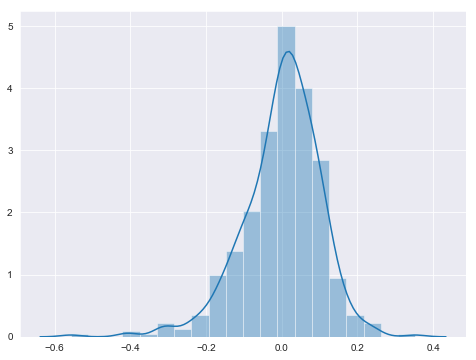

In [70]:
plt.figure(figsize=(8,6))
sns.set_style('darkgrid')
sns.distplot(res,bins=20)
plt.show()

We can see that the error terms are normally distributed with mean centred around 0

# Prediction

In [71]:
#do the same transformation on test set  as we have done on training set. it is crucial
num_vars=['temp','hum', 'windspeed','cnt']
#transform test data using the scaler obtained from fiting on training set
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [72]:
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
261,0,0,1,0.628895,0.711035,0.266662,0.495956,0,0,0,...,0,0,1,0,0,0,0,0,0,1
278,0,0,1,0.558310,0.639759,0.232053,0.523240,0,0,0,...,0,1,0,0,0,1,0,0,0,0
724,1,0,1,0.236399,0.848432,0.606415,0.001207,0,1,0,...,0,0,0,0,0,0,0,1,1,0
458,1,0,1,0.619270,0.483898,0.326928,0.724979,0,0,0,...,1,0,0,0,0,0,0,1,0,0
246,0,0,0,0.834233,0.764705,0.379481,0.544368,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Dividing into X_test and y_test

In [73]:
y_test=bike_test.pop('cnt')
X_test=bike_test

In [74]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

In [75]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
# Making predictions
y_test_pred = lm6.predict(X_test_new)

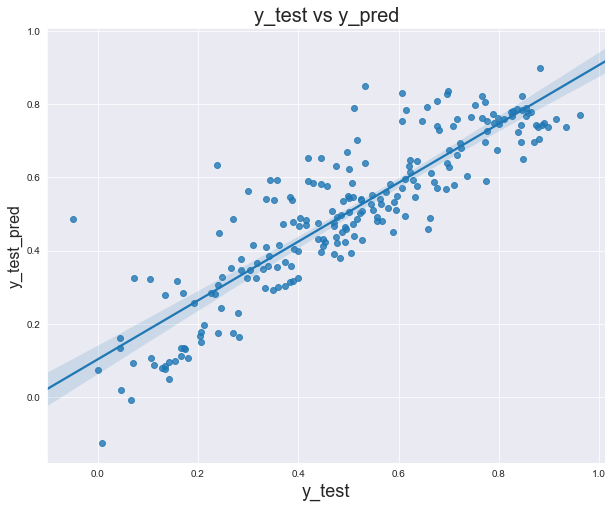

In [77]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_test_pred', fontsize=16) 
plt.show()                        

In [78]:
#evaluate the model
from sklearn.metrics import r2_score

In [79]:
print("R-squared of test set")
r2_score(y_true=y_test,y_pred=y_test_pred)

R-squared of test set


0.7709088211178117

In [80]:
print("R-squared of training set")
r2_score(y_true=y_train,y_pred=y_train_pred)

R-squared of training set


0.8052337665832217

**Conclusion:**

We have a model which has R squared as 0.805 and Adj. R-squared  as 0.801 on training dataset. So 80.1% of the variance in training data can be explained by this model.R-squared of test set is 0.7709. So 77.09% of variance in test data can be explained by this model.The Prob (F-statistic) is 3.84e-170 which is significantly lower than 0.05. This shows that the model fit is significant    

The below variables are important predictor:

'const', 'yr', 'temp', 'mnth_Dec', 'mnth_Nov', 'mnth_Sep','season_spring', 'season_summer', 'season_winter', 'weekday_Sun','weathersit_Light Snow'